In [1]:
import pandas as pd
import numpy as np
#import panel as pn
import os
#pn.extension('tabulator')

#import hvplot.pandas


import matplotlib.pyplot as plt
import math

In [28]:
filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data_freeze.csv"
#filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data.csv"

In [29]:
filepath

'/Users/Sunny/Desktop/viz_german_lm/results_data_freeze.csv'

In [30]:
df = pd.read_csv(filepath)
df

,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_precision,eval_recall,eval_f1,eval_exact_match
0,gnad10,1.818594,0.353113,7.4444,138.090,17.328,1.0,1028,gpt2-wechsel-german,classification,single_label_classification,4,label,NaN,NaN,NaN,NaN
1,german-europarl,0.116236,0.968291,2.6316,455.992,56.999,1.0,1200,gpt2-wechsel-german,token_classification,NaN,4,NaN,0.000000,0.000000,0.000000,NaN
2,german-ler,0.079763,0.983372,165.9189,40.176,5.027,1.0,6666,bloom-7b1-twc-german,token_classification,NaN,4,NaN,0.637377,0.771123,0.697900,NaN
3,germeval17,0.787164,0.636009,161.5043,15.888,1.988,1.0,2566,gpt2-xl-german,classification,single_label_classification,4,sentiment,NaN,NaN,NaN,NaN
4,gnad10,1.069813,0.742218,92.8016,11.077,1.390,1.0,1028,bloom-7b1-twc-german,classification,single_label_classification,1,label,NaN,NaN,NaN,NaN
5,gnad10,1.709717,0.515564,7.3750,139.389,17.491,1.0,1028,bert-german,classification,single_label_classification,4,label,NaN,NaN,NaN,NaN
6,german-ler,0.148560,0.955989,19.6680,338.926,42.404,1.0,6666,bert-german,token_classification,NaN,4,NaN,0.313426,0.415311,0.357246,NaN
7,german-europarl,0.144541,0.966419,2.6655,450.196,56.275,1.0,1200,bert-german,token_classification,NaN,4,NaN,0.000000,0.000000,0.000000,NaN
8,germeval18,0.274498,0.880518,192.9367,17.612,2.203,1.0,3398,bloom-1b7-german,classification,single_label_classification,4,multi,NaN,NaN,NaN,NaN
9,german-ler,0.069835,0.982420,85.8716,77.627,9.712,1.0,6666,bloom-1b7-german,token_classification,NaN,4,NaN,0.610659,0.759024,0.676806,NaN


In [31]:
df.fillna(0,inplace=True)
idf = df.interactive()
df

AttributeError: 'DataFrame' object has no attribute 'interactive'

In [32]:
df_cls = df[df.problem_type == "classification"]
df_cls = df_cls.drop_duplicates(ignore_index = True)
df_cls


,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_precision,eval_recall,eval_f1,eval_exact_match
0,gnad10,1.818594,0.353113,7.4444,138.090,17.328,1.0,1028,gpt2-wechsel-german,classification,single_label_classification,4,label,0.0,0.0,0.0,0.0
1,germeval17,0.787164,0.636009,161.5043,15.888,1.988,1.0,2566,gpt2-xl-german,classification,single_label_classification,4,sentiment,0.0,0.0,0.0,0.0
2,gnad10,1.069813,0.742218,92.8016,11.077,1.390,1.0,1028,bloom-7b1-twc-german,classification,single_label_classification,1,label,0.0,0.0,0.0,0.0
3,gnad10,1.709717,0.515564,7.3750,139.389,17.491,1.0,1028,bert-german,classification,single_label_classification,4,label,0.0,0.0,0.0,0.0
4,germeval18,0.274498,0.880518,192.9367,17.612,2.203,1.0,3398,bloom-1b7-german,classification,single_label_classification,4,multi,0.0,0.0,0.0,0.0
5,germeval18,0.669357,0.877869,595.8855,5.702,0.713,1.0,3398,bloom-7b1-twc-german,classification,single_label_classification,1,multi,0.0,0.0,0.0,0.0
6,germeval18,0.878851,0.660977,24.2855,139.919,17.500,1.0,3398,gpt2-wechsel-german,classification,single_label_classification,4,multi,0.0,0.0,0.0,0.0
7,gnad10,1.927360,0.482490,35.0456,29.333,3.681,1.0,1028,bloom-1b7-german,classification,single_label_classification,16,label,0.0,0.0,0.0,0.0
8,germeval17,0.742451,0.659782,18.0695,142.007,17.765,1.0,2566,bert-german,classification,single_label_classification,4,sentiment,0.0,0.0,0.0,0.0
9,germeval18,0.773414,0.662154,23.8491,142.479,17.820,1.0,3398,bert-german,classification,single_label_classification,4,multi,0.0,0.0,0.0,0.0


['germeval18', 'germeval17', 'gnad10']
['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german', 'bloom-7b1-twc-german', 'bloom-1b7-german']
germeval18
bert-german
  dataset_name  eval_loss  eval_accuracy  eval_runtime  \
9   germeval18   0.773414       0.662154       23.8491   

   eval_samples_per_second  eval_steps_per_second  epoch  eval_samples  \
9                  142.479                  17.82    1.0          3398   

    model_name    problem_type          problem_description  batch_size  \
9  bert-german  classification  single_label_classification           4   

   label  eval_precision  eval_recall  eval_f1  eval_exact_match  
9  multi             0.0          0.0      0.0               0.0  
germeval18
gpt2-xl-german
   dataset_name  eval_loss  eval_accuracy  eval_runtime  \
13   germeval18   0.885074       0.661566      208.7746   

    eval_samples_per_second  eval_steps_per_second  epoch  eval_samples  \
13                   16.276                  2.036    1.0         

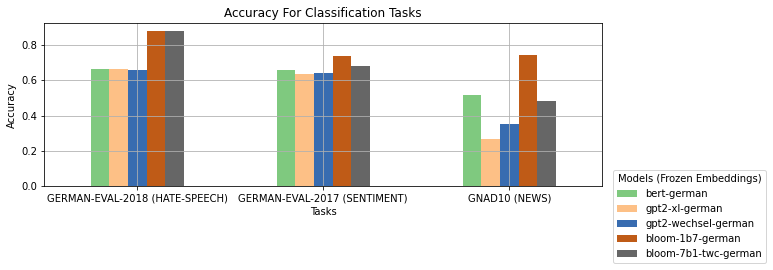

In [35]:
from matplotlib import cm
import matplotlib as mpl

nice_dataset_names = {
    'germeval18': 'GERMAN-EVAL-2018 (HATE-SPEECH)',
    'german-quad': 'GERMAN-QUAD',
    'germeval17': 'GERMAN-EVAL-2017 (SENTIMENT)',
    'german-ler': 'GERMAN-LEGAL-ENTITY-RECOGNITION',
    'gnad10': 'GNAD10 (NEWS)',
    'german-europarl': 'GERMAN-EUROPARL'
}

ds_name = list(set(df_cls.dataset_name))
print(ds_name)

#model_name = list(set(df_cls.model_name))
model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german', 'bloom-7b1-twc-german', 'bloom-1b7-german']
print(model_name)

cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    #curr_ds_list.append(str(each_ds))
    for each_model in model_name:
        #df_subset = df_cls[(df_cls.dataset_name == each_ds) & (df_cls.model_name == each_model)]
        df_subset = df_cls.loc[(df_cls['dataset_name'] == each_ds) & (df_cls['model_name'] == each_model)]
        print(each_ds)
        print(each_model)
        print(df_subset)
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_accuracy'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
#df_new = pd.DataFrame(all_evals, columns = ['Models', 'bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german'])
df_new = pd.DataFrame(all_evals, columns = ['Tasks', 'bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german', 'bloom-1b7-german', 'bloom-7b1-twc-german'])
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='Accuracy For Classification Tasks',
    #xlabel = 'Datasets',
    ylabel = 'Accuracy',
    colormap='Accent',
)


plt.rcParams["figure.figsize"] = (10,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360)
plt.grid()
plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('classification_res_freeze.png', bbox_inches='tight')

#plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('classification_res.png', bbox_inches='tight')


In [36]:
df_ner = df[df.problem_type == "token_classification"]
df_ner = df_ner.drop_duplicates(ignore_index = True)
df_ner


,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_precision,eval_recall,eval_f1,eval_exact_match
0,german-europarl,0.116236,0.968291,2.6316,455.992,56.999,1.0,1200,gpt2-wechsel-german,token_classification,0,4,0,0.000000,0.000000,0.000000,0.0
1,german-ler,0.079763,0.983372,165.9189,40.176,5.027,1.0,6666,bloom-7b1-twc-german,token_classification,0,4,0,0.637377,0.771123,0.697900,0.0
2,german-ler,0.148560,0.955989,19.6680,338.926,42.404,1.0,6666,bert-german,token_classification,0,4,0,0.313426,0.415311,0.357246,0.0
3,german-europarl,0.144541,0.966419,2.6655,450.196,56.275,1.0,1200,bert-german,token_classification,0,4,0,0.000000,0.000000,0.000000,0.0
4,german-ler,0.069835,0.982420,85.8716,77.627,9.712,1.0,6666,bloom-1b7-german,token_classification,0,4,0,0.610659,0.759024,0.676806,0.0
5,german-ler,0.121078,0.968164,19.5539,340.904,42.651,1.0,6666,gpt2-wechsel-german,token_classification,0,4,0,0.471024,0.567434,0.514754,0.0
6,german-ler,0.141943,0.962326,66.8313,99.744,12.479,1.0,6666,gpt2-xl-german,token_classification,0,4,0,0.389245,0.457953,0.420813,0.0
7,german-europarl,0.157560,0.966419,11.8156,101.560,12.695,1.0,1200,gpt2-xl-german,token_classification,0,4,0,0.000000,0.000000,0.000000,0.0
8,german-europarl,0.013931,0.995985,28.8572,41.584,5.198,1.0,1200,bloom-7b1-twc-german,token_classification,0,4,0,0.000000,0.000000,0.000000,0.0
9,german-europarl,0.030696,0.991630,10.5417,113.834,14.229,1.0,1200,bloom-1b7-german,token_classification,0,4,0,0.000000,0.000000,0.000000,0.0


['german-europarl', 'german-ler']
['bloom-1b7-german', 'bloom-7b1-twc-german', 'gpt2-wechsel-german', 'gpt2-xl-german', 'bert-german']
german-europarl
bloom-1b7-german
german-europarl
bloom-7b1-twc-german
german-europarl
gpt2-wechsel-german
german-europarl
gpt2-xl-german
german-europarl
bert-german
german-ler
bloom-1b7-german
german-ler
bloom-7b1-twc-german
german-ler
gpt2-wechsel-german
german-ler
gpt2-xl-german
german-ler
bert-german
[['GERMAN-EUROPARL', 0.9916303756124116, 0.9959853021230268, 0.9682906913445836, 0.9664194338595536, 0.9664194338595536], ['GERMAN-LEGAL-ENTITY-RECOGNITION', 0.9824196127531664, 0.9833715515664786, 0.9681639773222852, 0.962325731890888, 0.9559888893059568]]


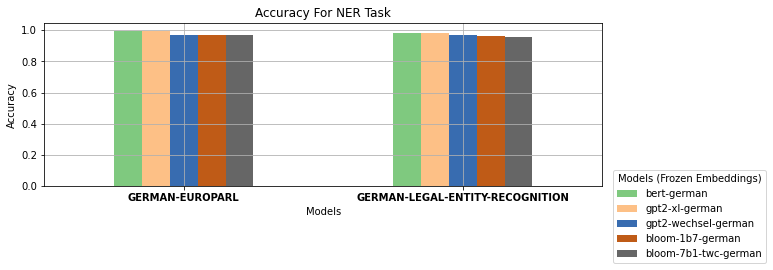

In [37]:
from matplotlib import cm

ds_name = list(set(df_ner.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_ner[(df_ner.dataset_name == each_ds) & (df_ner.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            print(each_ds)
            print(each_model)
            curr_eval = df_subset['eval_accuracy'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
df_new = pd.DataFrame(all_evals, columns = ['Models', 'bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german', 'bloom-1b7-german', 'bloom-7b1-twc-german'])
df_new.plot(
    x='Models', 
    kind = 'bar', 
    stacked = False, 
    title='Accuracy For NER Task',
    #xlabel = 'Datasets',
    ylabel = 'Accuracy',
    colormap='Accent',
)

plt.rcParams["figure.figsize"] = (10,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360, weight = 'bold')
plt.grid()

plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('ner_res_freeze.png', bbox_inches='tight')

#plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('ner_res.png', bbox_inches='tight')


In [38]:
df_qa = df[df.problem_type == "question_answering"]
df_qa = df_qa.drop_duplicates(ignore_index = True)
df_qa

,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_precision,eval_recall,eval_f1,eval_exact_match
0,german-quad,0.0,0.0,26.933,141.202,17.673,1.0,3803,bert-german,question_answering,0,4,0,0.0,0.0,10.736483,1.724138


['german-quad']
['bloom-1b7-german', 'bloom-7b1-twc-german', 'gpt2-wechsel-german', 'gpt2-xl-german', 'bert-german']
[['GERMAN-QUAD', 10.736482953877127]]


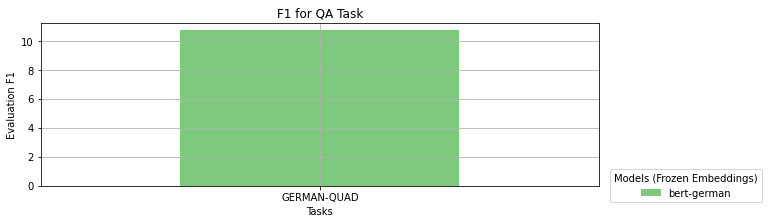

In [39]:
from matplotlib import cm

ds_name = list(set(df_qa.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_qa[(df_qa.dataset_name == each_ds) & (df_qa.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_f1'].values[0]
            curr_ds_list.append(curr_eval)
            #print(curr_eval)
        
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
df_new = pd.DataFrame(all_evals, columns = ['Tasks', 'bert-german'])
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='F1 for QA Task',
    #xlabel = 'Datasets',
    ylabel = 'Evaluation F1',
    colormap='Accent',
)

plt.rcParams["figure.figsize"] = (2,2)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360)
plt.grid()
plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('qa_res_freeze.png', bbox_inches='tight')

#plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('qa_res.png', bbox_inches='tight')


In [6]:
class_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "classification") & (idf.model_name == class_widget)]
classification_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "True", 
                                          ylabel = "Evaluation Accuracy",
                                          xlabel = "Datasets",
                                          title = "Classification Task Performance",
                                          color=["#f16a6f"],
                                         )

pn.Row(classification_plot)

Row
    [0] Interactive(Interactive)

In [7]:
ner_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "token_classification") & (idf.model_name == ner_widget)]
ner_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "false",
                                ylabel = "Evaluation Accuracy",
                                xlabel = "Datasets",
                               title = "NER Task Performance",
                               color = ["#1e85f7"]
                              )

pn.Row(ner_plot)

Row
    [0] Interactive(Interactive)

In [8]:
qa_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german'])

idf_filtered = idf[(idf.problem_type == "question_answering") & (idf.model_name == qa_widget)]
qa_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y="eval_f1", colorbar = "false", 
                                ylabel = "Evaluation F1",
                                xlabel = "Datasets",
                                title = "QA Task Performance"
                             )

pn.Row(qa_plot)

Row
    [0] Interactive(Interactive)

In [9]:
idf_filtered = idf[["dataset_name", "model_name", "batch_size", "epoch", "eval_runtime"]]

raw_table = idf_filtered.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
raw_table

In [10]:
main_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german', 'gpt2-wechsel'])


template = pn.template.FastListTemplate(
    title='Performance of German LLMs', 
    #sidebar=[pn.pane.Markdown("#"), 
    #         pn.pane.Markdown(""), 
    #         pn.pane.Markdown("#"),   
    #         ],
    
    
    main=[pn.Row(pn.Column(class_widget, 
                           classification_plot.panel(width=700), margin=(0,25)), 
                 raw_table.panel(width=500)), 
          pn.Row(pn.Column(ner_widget, ner_plot.panel(width=600), margin=(0,25)), 
                 pn.Column(qa_widget, qa_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
                 
template.show()
#template.servable()

Launching server at http://localhost:49403
